In [1]:
pip install morningstar

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd, numpy as np

Python爬取晨星网的基金数据

https://blog.csdn.net/wulex/article/details/108605019

In [2]:
import sys
from lxml import etree
import time
import random
import requests
import json
import csv
from selenium import webdriver   # 导入webdriver模块
from bs4 import BeautifulSoup
from time import sleep

In [3]:
class ChengxingspiderItem:
    def __init__(self):
        self.fund_code = ""
        self.fund_name = ""
        self.fund_price = ""
        self.category = ""
        self.inception = ""
        self.subscribe = ""
        self.redeem = ""
        self.sbdesc = ""
        self.sharprate = ""
        self.date = ""
        self._i = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self._i == 0:
            self._i += 1
            return self.fund_code
        elif self._i == 1:
            self._i += 1
            return self.fund_name
        elif self._i == 2:
            self._i += 1
            return self.fund_price
        elif self._i == 3:
            self._i += 1
            return self.category
        elif self._i == 4:
            self._i += 1
            return self.sharprate
        elif self._i == 5:
            self._i += 1
            return self.date
        else:
            raise StopIteration()


In [4]:
class FundSpider():
    name = 'fund'
    allowed_domains = ['cn.morningstar.com/quicktake/']
    # fund_list = ['0P0000Z821', 'F0000003VJ', '0P00016WFU', 'F000000416', 'F0000004AI',
    #             '0P00015HFT', 'F0000003ZX', '0P000147K8', '0P0000P5UD', '0P0001606X']
    fund_list = ['0P0000RU7I', '0P0000S0NU', '0P0000XBF0', '0P0000YXTA', '0P0000Z5JW', '0P0000ZEAH', '0P00015WGK', '0P0001606X', '0P000160TK', '0P00016A08', '0P00016DKC',
                 '0P00016FT6', '0P000178CP', '0P00018J2K', '0P00018KU4', '0P0001ABM2', '0P0001D6IU', '0P0001F1K9', '0P0001FDKQ', 'F0000003VJ', 'F0000004AI', 'F0000004JE']

    start_urls = [
        f'http://cn.morningstar.com/quicktake/{page}' for page in fund_list]

    # json_url = 'http://cn.morningstar.com/handler/quicktake.ashx'
    url = 'http://cn.morningstar.com/handler/quicktake.ashx'
    webUrl = 'http://cn.morningstar.com/quicktake/'

    def parse(self, response):

        # 把网页变成xpath结构
        fund_xpath = etree.HTML(response)
        item = ChengxingspiderItem()

        fund_name = fund_xpath.xpath('//*[@id="qt_fund"]/span[1]/text()')
        fund_price = fund_xpath.xpath(
            '//*[@id="qt_base"]/ul[1]/li[2]/span/text()')
        date = fund_xpath.xpath('//*[@id="qt_base"]/ul[1]/li[3]/text()')

        category = fund_xpath.xpath(
            '//*[@id="qt_base"]/ul[3]/li[7]/span/text()')
        sharprate = fund_xpath.xpath('//*[@id="qt_risk"]/li[30]/text()')

        item.fund_code = fund_name[0][:6]
        item.fund_name = fund_name[0][7:]
        item.fund_price = fund_price[0]
        if len(category) != 0:
            item.category = category[0]
        if len(sharprate) != 0:
            item.sharprate = sharprate[0]

        item.date = date[0][5:]

        print(item.fund_code)
        print(item.fund_name)
        print(item.fund_price)
        print(item.category)
        print(item.sharprate)

        # print(len(date[0]))
        # print(type(item['date']))
        # print(type(fund_price))
        # print(dir(fund_price))
        # print(len(str(date)))
        # print(str(date)[-12:-1])
        return list(item)

In [5]:
if __name__ == '__main__':

    # headers = {'User-Agent':
    #           'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36',
    #           'Host': 'cn.morningstar.com'
    #          }
    fs = FundSpider()

    # 指定chrom的驱动
    # 执行到这里的时候Selenium会到指定的路径将chrome driver程序运行起来
    # driver = webdriver.Chrome('./chromedriver/chromedriver.exe')
    # driver = webdriver.Firefox()#这里是火狐的浏览器运行方法

    options = webdriver.ChromeOptions()
    options.add_argument("--no-sandbox")
    driver = webdriver.Chrome(
        './chromedriver/chromedriver.exe', chrome_options=options)

    cookies = ''
    headers = ['fund_code', 'fund_name',
               'fund_price', 'category', 'sharprate', 'date']
    rows = [

    ]

    for urlitem in fs.start_urls:
        # soup = BeautifulSoup(html_doc, 'html.parser')
        if(cookies == ''):
            # 可以通过 id 获取 form 表单
            driver.get(urlitem)
            username = driver.find_element_by_id('emailTxt')
            password = driver.find_element_by_id('pwdValue')
            username.send_keys('***********@qq.com')
            password.send_keys('w*************')
            submit = driver.find_element_by_id('loginGo')
            submit.click()
            sleep(1)
            # 获取网站cookie
            cookies = driver.get_cookies()
        else:
            # driver.add_cookie(cookies)
            driver.get(urlitem)
        singlerow = fs.parse(driver.page_source)
        rows.append(singlerow)
        # reobj = requests.get(urlitem, headers=headers)  # 对HTTP响应的数据
        # fs.parse(reobj)

    with open('test.csv', 'w', newline='')as f:
        f_csv = csv.writer(f)
        f_csv.writerow(headers)
        f_csv.writerows(rows)

/Users/miaoyuesun/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


WebDriverException: Message: 'chromedriver.exe' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [ ]:
pandas_datareader.mstar.daily.MorningstarDailyReader(symbols, 
                                                     start=None, 
                                                     end=None, 
                                                     retry_count=3, 
                                                     pause=0.1, 
                                                     timeout=30, 
                                                     session=None, 
                                                     freq=None, 
                                                     incl_splits=False, 
                                                     incl_dividends=False, 
                                                     incl_volume=True, 
                                                     currency='usd', 
                                                     interval='d')

In [7]:
import pandas_datareader as pdr

In [13]:
def get_data(ticker):
    try:
        df = pandas_datareader.data.DataReader('%s' % (ticker), data_source='morningstar', "2020-01-01", "2020-12-1", retry_count=0)
        print(df.tail(5))
    except ValueError:
        print('Ticker Symbol %s is not available!' % (ticker))

SyntaxError: positional argument follows keyword argument (<ipython-input-13-1e6463922515>, line 3)

In [14]:
get_data('TSLA') #valid Symbol

NotImplementedError: data_source='morningstar' is not implemented

In [8]:
pdr.mstar.daily.MorningstarDailyReader("161903")

AttributeError: module 'pandas_datareader' has no attribute 'mstar'

In [15]:
from pandas_datareader.DataReader.

ImportError: cannot import name 'mstar'

In [16]:
import tushare as ts
token='41cbc98ddd6c55a141cf281d0636c4ef25c13ff69e38bc400f3f4ebd'
ts.set_token(token)

# 20201108 任务（预计15:00之前完成）：

1. 找到tushare基金base里规模前十的公募基金
2. 处理整合时间序列
3. 将十只基金的时间序列plot在一张图上

# 基金基本信息

In [18]:
pro = ts.pro_api()
df = pro.fund_basic(market='E')

get到所有fund的tickers

In [29]:
fund_all_list = list(df['ts_code'].values)

In [30]:
fund_all_list

['159821.SZ',
 '159822.SZ',
 '588080.SH',
 '588090.SH',
 '511000.SH',
 '588050.SH',
 '588000.SH',
 '159823.SZ',
 '515760.SH',
 '510370.SH',
 '518890.SH',
 '502056.SH',
 '510760.SH',
 '515500.SH',
 '161121.SZ',
 '159820.SZ',
 '159808.SZ',
 '518860.SH',
 '159815.SZ',
 '511360.SH',
 '513990.SH',
 '159816.SZ',
 '512350.SH',
 '159819.SZ',
 '515260.SH',
 '515610.SH',
 '159999.SZ',
 '511180.SH',
 '518600.SH',
 '518680.SH',
 '510570.SH',
 '515560.SH',
 '512320.SH',
 '159814.SZ',
 '511050.SH',
 '159810.SZ',
 '515830.SH',
 '513080.SH',
 '515100.SH',
 '515820.SH',
 '515770.SH',
 '510690.SH',
 '159809.SZ',
 '167508.SZ',
 '515190.SH',
 '515780.SH',
 '159988.SZ',
 '159812.SZ',
 '159803.SZ',
 '515960.SH',
 '518660.SH',
 '159813.SZ',
 '515670.SH',
 '515620.SH',
 '159802.SZ',
 '515930.SH',
 '518850.SH',
 '501099.SH',
 '510200.SH',
 '168701.SZ',
 '515130.SH',
 '515280.SH',
 '159811.SZ',
 '164508.SZ',
 '501098.SH',
 '501097.SH',
 '159998.SZ',
 '160527.SZ',
 '515890.SH',
 '159991.SZ',
 '159992.SZ',
 '5156

In [35]:
fund_all_strs = ",".join(fund_all_list)

get到这些list里对应的对应基金规模数据

In [39]:
fund_share_df_list = []
for ticker in fund_all_list:
    each_share_df = pro.fund_share(ts_code=ticker)
    fund_share_df_list.append(each_share_df)
    print(ticker, "Appended")

159821.SZ Appended
159822.SZ Appended
588080.SH Appended
588090.SH Appended
511000.SH Appended
588050.SH Appended
588000.SH Appended
159823.SZ Appended
515760.SH Appended
510370.SH Appended
518890.SH Appended
502056.SH Appended
510760.SH Appended
515500.SH Appended
161121.SZ Appended
159820.SZ Appended
159808.SZ Appended
518860.SH Appended
159815.SZ Appended
511360.SH Appended
513990.SH Appended
159816.SZ Appended
512350.SH Appended
159819.SZ Appended
515260.SH Appended
515610.SH Appended
159999.SZ Appended
511180.SH Appended
518600.SH Appended
518680.SH Appended
510570.SH Appended
515560.SH Appended
512320.SH Appended
159814.SZ Appended
511050.SH Appended
159810.SZ Appended
515830.SH Appended
513080.SH Appended
515100.SH Appended
515820.SH Appended
515770.SH Appended
510690.SH Appended
159809.SZ Appended
167508.SZ Appended
515190.SH Appended
515780.SH Appended
159988.SZ Appended
159812.SZ Appended
159803.SZ Appended
515960.SH Appended
518660.SH Appended
159813.SZ Appended
515670.SH Ap

512000.SH Appended
160921.SZ Appended
160522.SZ Appended
168103.SZ Appended
512810.SH Appended
169105.SZ Appended
161834.SZ Appended
160520.SZ Appended
161630.SZ Appended
510810.SH Appended
165525.SZ Appended
512660.SH Appended
512880.SH Appended
167001.SZ Appended
164403.SZ Appended
160635.SZ Appended
511970.SH Appended
160225.SZ Appended
159949.SZ Appended
511850.SH Appended
169104.SZ Appended
163003.SZ Appended
501021.SH Appended
511910.SH Appended
501018.SH Appended
161727.SZ Appended
160519.SZ Appended
501017.SH Appended
161232.SZ Appended
165528.SZ Appended
162215.SZ Appended
159948.SZ Appended
165807.SZ Appended
160622.SZ Appended
160518.SZ Appended
162415.SZ Appended
501015.SH Appended
511920.SH Appended
164812.SZ Appended
161033.SZ Appended
168102.SZ Appended
163005.SZ Appended
1612301.SZ Appended
166016.SZ Appended
511820.SH Appended
5010021.SH Appended
501005.SH Appended
169103.SZ Appended
161823.SZ Appended
163907.SZ Appended
511960.SH Appended
161229.SZ Appended
164206.SZ 

160212.SZ Appended
159925.SZ Appended
159923.SZ Appended
510500.SH Appended
150118.SZ Appended
150117.SZ Appended
159922.SZ Appended
160720.SZ Appended
150102.SZ Appended
150114.SZ Appended
511990.SH Appended
150115.SZ Appended
510330.SH Appended
163415.SZ Appended
161821.SZ Appended
159921.SZ Appended
166902.SZ Appended
161119.SZ Appended
160621.SZ Appended
150112.SZ Appended
150113.SZ Appended
150100.SZ Appended
150101.SZ Appended
150106.SZ Appended
150107.SZ Appended
150108.SZ Appended
150109.SZ Appended
150092.SZ Appended
150093.SZ Appended
150094.SZ Appended
150095.SZ Appended
150111.SZ Appended
150110.SZ Appended
510440.SH Appended
510430.SH Appended
159920.SZ Appended
161820.SZ Appended
510900.SH Appended
150090.SZ Appended
150091.SZ Appended
160916.SZ Appended
164702.SZ Appended
150001.SZ Appended
150096.SZ Appended
150097.SZ Appended
150105.SZ Appended
150104.SZ Appended
164810.SZ Appended
161117.SZ Appended
510420.SH Appended
150088.SZ Appended
150089.SZ Appended
150080.SZ Ap

In [41]:
fund_share_df = pd.concat(fund_share_df_list)

In [44]:
fund_share_df.to_csv("20201108_fund_share_df.csv", index = False)

In [64]:
fund_share_df['fund_type'].unique()

array(['ETF', 'CEF', None, 'SF', 'LOF'], dtype=object)

In [50]:
fd_share_ranking = pd.DataFrame(fund_share_df.groupby(['ts_code'])['fd_share'].mean())

In [56]:
fd_share_ranking.sort_values('fd_share', ascending=False, inplace=True)

In [62]:
top_20_tickers_by_share = list(fd_share_ranking.head(20).index)

In [63]:
top_20_tickers_by_share

['511990.SH',
 '511880.SH',
 '163417.SZ',
 '160706.SZ',
 '161728.SZ',
 '161131.SZ',
 '160142.SZ',
 '512960.SH',
 '511660.SH',
 '159995.SZ',
 '515050.SH',
 '501188.SH',
 '512950.SH',
 '515900.SH',
 '510050.SH',
 '501189.SH',
 '163402.SZ',
 '510810.SH',
 '501186.SH',
 '515030.SH']

Plot这20只fund的资金曲线

In [65]:
fund_share_df

,ts_code,trade_date,fd_share,fund_type,market
0,159821.SZ,20201106,9792.0000,ETF,SZ
1,159821.SZ,20201105,10992.0000,ETF,SZ
2,159821.SZ,20201104,11592.0000,ETF,SZ
3,159821.SZ,20201103,15192.0000,ETF,SZ
4,159821.SZ,20201102,17742.0000,ETF,SZ
...,...,...,...,...,...
1,184702.SZ,20000807,50000.0000,CEF,SZ
2,184702.SZ,20000515,26802.7448,CEF,SZ
0,500028.SH,20011126,50000.0000,None,SH
1,500028.SH,20010920,50000.0000,None,SH


In [67]:
# top_20_fund_df_fund_share_df[fund_share_df['ts_code'].isin(top_20_tickers_by_share)]

,ts_code,trade_date,fd_share,fund_type,market
0,515030.SH,20200914,7.838384e+05,None,SH
1,515030.SH,20200910,7.794884e+05,None,SH
2,515030.SH,20200909,7.758884e+05,None,SH
3,515030.SH,20200907,7.677884e+05,None,SH
4,515030.SH,20200904,7.677884e+05,None,SH
...,...,...,...,...,...
1995,510050.SH,20120510,1.174900e+06,ETF,SH
1996,510050.SH,20120509,1.171200e+06,ETF,SH
1997,510050.SH,20120508,1.169400e+06,ETF,SH
1998,510050.SH,20120507,1.174400e+06,ETF,SH


In [68]:
fund_nav_df_list = []
for ticker in top_20_tickers_by_share:
    each_nav_df = pro.fund_nav(ts_code=ticker)
    fund_nav_df_list.append(each_nav_df)
    print(ticker, "Appended")

511990.SH Appended
511880.SH Appended
163417.SZ Appended
160706.SZ Appended
161728.SZ Appended
161131.SZ Appended
160142.SZ Appended
512960.SH Appended
511660.SH Appended
159995.SZ Appended
515050.SH Appended
501188.SH Appended
512950.SH Appended
515900.SH Appended
510050.SH Appended
501189.SH Appended
163402.SZ Appended
510810.SH Appended
501186.SH Appended
515030.SH Appended


In [70]:
fund_nav_df = pd.concat(fund_nav_df_list)

In [87]:
fund_nav_df

,ts_code,ann_date,end_date,unit_nav,accum_nav,accum_div,net_asset,total_netasset,adj_nav,update_flag
0,511990.SH,20201107,20201106,1.0000,None,None,NaN,NaN,12735.5844,1
1,511990.SH,20201106,20201105,1.0000,None,None,NaN,NaN,12734.8939,1
2,511990.SH,20201105,20201104,1.0000,None,None,NaN,NaN,12734.1857,1
3,511990.SH,20201104,20201103,1.0000,None,None,NaN,NaN,12733.4646,1
4,511990.SH,20201103,20201102,1.0000,None,None,NaN,NaN,12732.7244,1
...,...,...,...,...,...,...,...,...,...,...
168,515030.SH,20200304,20200303,0.9819,0.9819,None,NaN,NaN,0.9819,0
169,515030.SH,20200229,20200228,0.9494,0.9494,None,NaN,NaN,0.9494,0
170,515030.SH,20200228,20200226,0.9944,0.9944,None,1.070217e+10,1.07022e+10,0.9944,0
171,515030.SH,20200222,20200221,1.0007,1.0007,None,NaN,NaN,1.0007,1


In [72]:
# fund_nav_df_grp_by_ann_date = fund_nav_df.groupby(['ann_date'])

Test how to transform data

In [118]:
fund_nav_df_test_2_pivot = fund_nav_df_test_2.pivot_table(index='ann_date', columns=['ts_code'], values='adj_nav')

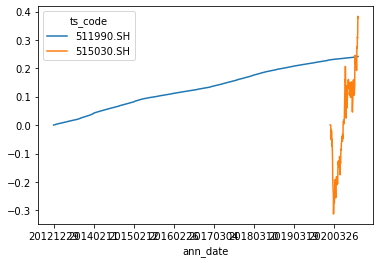

In [133]:
fund_nav_df_test_2_pivot.pct_change().cumsum().plot()

In [137]:
def calculate_returns(values):
    pct_chg = values.pct_change()
    pct_chg_sum = pct_chg.sum()
    pct_chg_sum_plus_1 = pct_chg_sum+1
    final_return = pct_chg_sum_plus_1.cumprod()
    return final_return

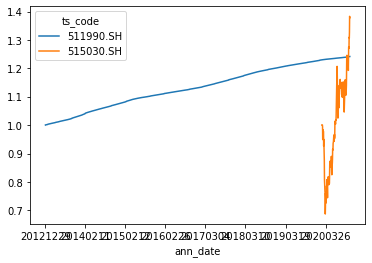

In [146]:
(1+fund_nav_df_test_2_pivot.pct_change().cumsum()).plot()

In [145]:
fund_nav_df_test_2_pivot

ts_code,511990.SH,515030.SH
ann_date,,
20121229,10001.1902,NaN
20130101,10004.1876,NaN
20130105,10008.9664,NaN
20130112,10010.6887,NaN
20130119,10011.8450,NaN
...,...,...
20201103,12732.3685,1.2921
20201104,12733.4646,1.2889
20201105,12734.1857,1.3169


# Now let's transform the original big dataset

In [147]:
fund_nav_df_pivot = fund_nav_df.pivot_table(index='ann_date', columns=['ts_code'], values='adj_nav')

In [153]:
fund_nav_df_pivot.dropna()

ts_code,159995.SZ,160142.SZ,160706.SZ,161131.SZ,161728.SZ,163402.SZ,163417.SZ,501186.SH,501188.SH,501189.SH,510050.SH,510810.SH,511660.SH,511880.SH,511990.SH,512950.SH,512960.SH,515030.SH,515050.SH,515900.SH
ann_date,,,,,,,,,,,,,,,,,,,,
20200221,1.2480,1.1115,4.578142,1.0970,1.0926,19.005727,1.2422,1.1119,1.1054,1.0870,4.585515,0.911179,11193.6136,1.258243,12585.7660,0.9889,0.9860,1.0000,1.2437,0.9504
20200222,1.2767,1.1103,4.583876,1.0945,1.0915,19.052505,1.2479,1.1106,1.1053,1.0860,4.570070,0.917872,11194.3981,1.258493,12586.5380,0.9983,0.9956,1.0007,1.2838,0.9634
20200228,1.2159,1.1109,4.516208,1.0920,1.0904,19.108638,1.2279,1.1101,1.1018,1.0827,4.482036,0.893054,11198.8080,1.258831,12591.1101,0.9840,0.9816,0.9944,1.2982,0.9555
20200229,1.1465,1.1050,4.364049,1.0844,1.0871,18.556662,1.1810,1.1052,1.0920,1.0772,4.343034,0.860615,11199.5451,1.259069,12591.8748,0.9514,0.9492,0.9494,1.2319,0.9217
20200304,1.1589,1.1105,4.519266,1.0920,1.0904,19.181143,1.2155,1.1101,1.0999,1.0836,4.497481,0.893466,11202.4954,1.259232,12594.9293,0.9991,0.9968,0.9819,1.2814,0.9755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201103,1.1594,1.1205,5.237713,1.1109,1.1199,23.136624,1.8345,1.0779,1.1678,1.1386,5.122989,0.931363,11333.1179,1.274122,12732.3685,1.0402,1.0352,1.2921,1.2045,0.9678
20201104,1.1756,1.1221,5.297506,1.1126,1.1214,23.370996,1.8354,1.0798,1.1715,1.1418,5.187856,0.942588,11334.0572,1.274209,12733.4646,1.0585,1.0535,1.2889,1.2219,0.9834
20201105,1.1673,1.1223,5.334876,1.1142,1.1230,23.442327,1.8428,1.0801,1.1738,1.1477,5.226468,0.949076,11334.7619,1.274285,12734.1857,1.0641,1.0590,1.3169,1.2216,0.9880


In [149]:
fund_nav_df_pivot_returns = (1+fund_nav_df_pivot.pct_change().cumsum())

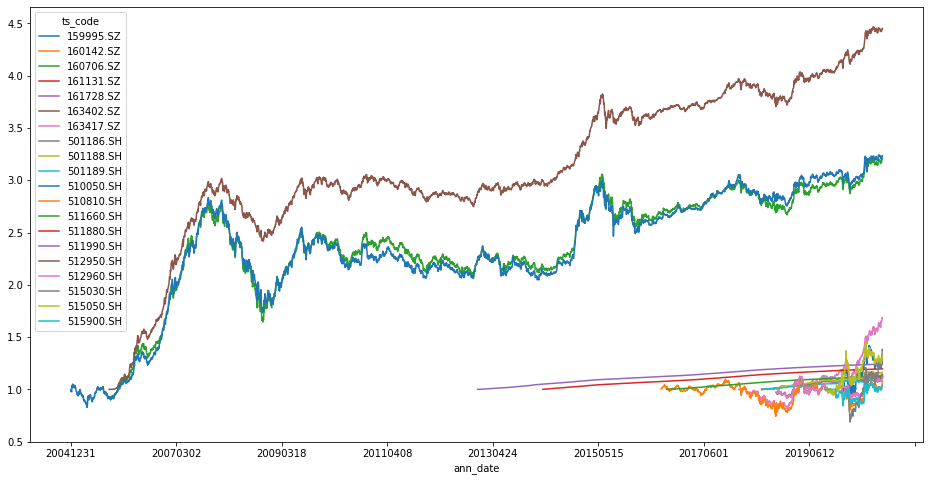

In [152]:
fund_nav_df_pivot_returns.plot(figsize = (16,8))